### Download Data From [Extended Yale Dataset](http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html)

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import os
import pandas as pd

### Read all images names from each folder 
### make full path to each image

### 38 subject * 64 illumination each of shape (m  rows 192, n cols 168) cropped and alligned


In [2]:
from test_utils import prepare_images_pths, read_pgm, plot_figure, get_unique_subjects, plot_imgs_mesh,  get_subject_pgms, vectors_matrix, plot_reshape_vector, fix_corrupted_vectors, get_avg_face


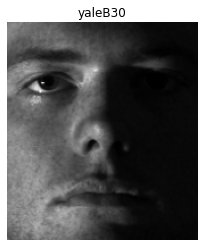

In [3]:
base_pth = "./CroppedYale"
subjects_imgs_pth, subjects_imgs_names = prepare_images_pths(base_pth)

rand_int = np.random.randint(0,len(subjects_imgs_pth))
image = read_pgm(f"{base_pth}/{subjects_imgs_pth[rand_int]}", byteorder='<')
subject = subjects_imgs_pth[rand_int].split("/")[0]
plot_figure(image, label=f"{subject}")

### Read PGM Files

### Make grid of first image from training subject images (36 subject)

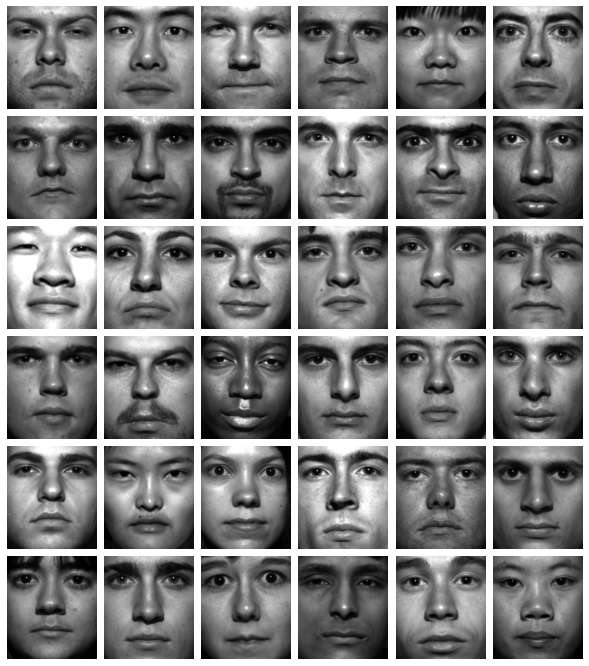

In [4]:
unique_imgs_pgm =  get_unique_subjects(base_pth, subjects_imgs_names)
plot_imgs_mesh(unique_imgs_pgm, 6, 6)

### make grid of yaleB01 subject all images with different illumination

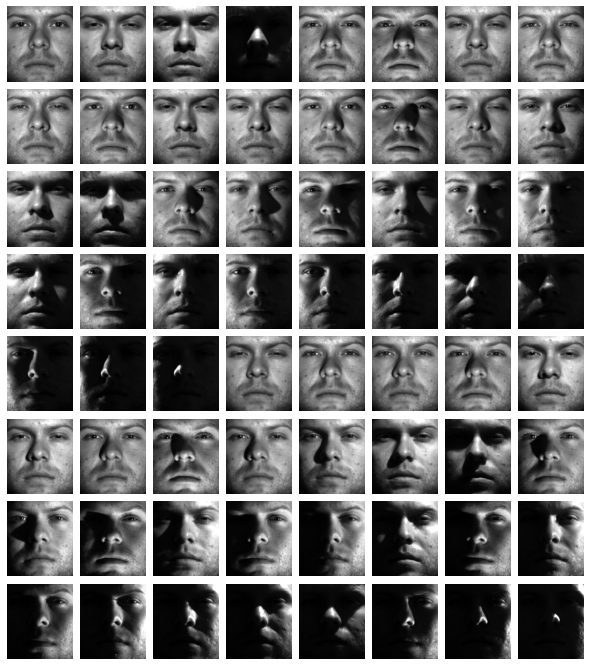

In [5]:
subject_pgms = get_subject_pgms(base_pth, subjects_imgs_names, 0)
plot_imgs_mesh(subject_pgms, 8, 8)

### X Matrix  for training data (chossing firsr 36 subject from total 38 subject)
-  Flatten pgms to colums 
-  Substract avg_face

e:\SBME\2022-2ndtern\cv\tasks\task1-python\assignment-5-cv-2022-sbe-404-team_10\test\test_utils.py:172: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  training_pgms_arr = np.array(training_pgms) #, dtype=object
e:\SBME\2022-2ndtern\cv\tasks\task1-python\assignment-5-cv-2022-sbe-404-team_10\test\test_utils.py:179: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  training_pgms_vectors = np.array(training_pgms_vectors) #, dtype=object


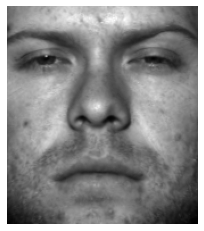

In [6]:
training_pgms_vectors = vectors_matrix(base_pth)
plot_reshape_vector(training_pgms_vectors, vector_num=6)

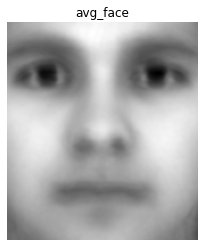

In [7]:
fixed_training_pgms_vectors = fix_corrupted_vectors(training_pgms_vectors)

avg_face = get_avg_face(fixed_training_pgms_vectors)    

img_reshaped = avg_face.reshape(192,168)
plot_figure(img_reshaped, label="avg_face")

## Singular Value Decomposition (SVD) ~ PCA (Eigen Analysis)

            > write some eqns

In [8]:
from test_utils import X_matrix, svd_simultaneous_power_iteration

Matrix Shape:  (32256, 2296)
U shape:  (32256, 2296)
S shape:  (2296,)
VT shape:  (2296, 2296)


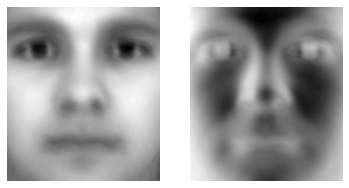

In [9]:
m= 192
n= 168

avg_face = get_avg_face(fixed_training_pgms_vectors)    

X = X_matrix(base_pth, s_strat=0, s_end=36)

U, S, VT = np.linalg.svd(X,full_matrices=0)
print("U shape: ",U.shape)
print("S shape: ",S.shape)
print("VT shape: ",VT.shape)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(avg_face.reshape(m,n))
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)))
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()


In [10]:
# load and save a matrix to be used in the gui

# np.savetxt('U.txt', U[:, :300])
# U = np.loadtxt('U.txt')

## Implementation of SVD using Power iteration algorithm


### Calcualtion of k eigenvectors and eigen values 
- K   > time
- 20  > 4.5 sec
- 50  > 10 sec
- 80  > 22 sec 
- 100 > 30 sec
- 120 > 1 min 3 sec 
- 150 > 59 sec 
- 180 > 1 min 39 sec 
- 200 > 1 min 25 sec 
- 800 > 7 min 42 sec

In [12]:
left_vecs_50, singular_values_50, right_vecs_50 = svd_simultaneous_power_iteration(X, 50)

In [13]:
left_vecs_200, singular_values_200, right_vecs_200 = svd_simultaneous_power_iteration(X, 200)

In [ ]:
left_vecs_800, singular_values_800, right_vecs_800 = svd_simultaneous_power_iteration(X, 800)

## Testing 
### np.svd and our svd reached very close performance estimating the `eigenfaces` 
> the cell bellow show random eigenfaces from both methods

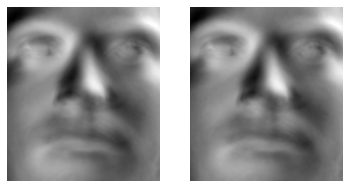

In [15]:

rand_int = np.random.randint(0,80)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(left_vecs_200[:,rand_int],(m,n)))
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,rand_int],(m,n)))
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

# left_ours                 #np.svd

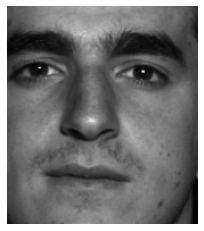

In [18]:
testing_pgms_vectors = vectors_matrix(base_pth, start=36, end=38)
plot_reshape_vector(testing_pgms_vectors, vector_num=100)

### Test Images subjects 37, 38

### reconstructing the test image by using Ur of eigenvectors `tradeoff between sparsity and accuracy`

### reconstruction using np.svd

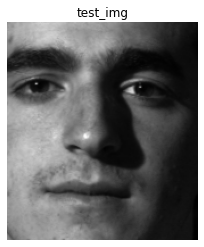

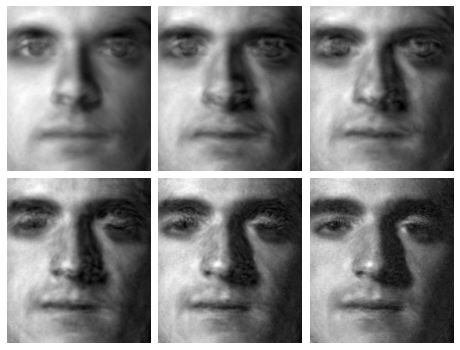

In [21]:
## Now show eigenface reconstruction of image that was omitted from test set

testFace =  img_flat =  testing_pgms_vectors[80].reshape(-1) # 2d to 1d# First face of person 37
plot_figure(np.reshape(testFace,(m,n)), label="test_img")

reconstructions = []
r_list = [50, 100, 200, 400, 800, 1600]
testFaceMS = testFace - avg_face
for r in r_list:
    alpha = U[:,:r].T @ testFaceMS
    reconFace = avg_face + U[:,:r]  @ alpha
    reconstructions.append(np.reshape(reconFace,(m,n)))

fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, reconstructions):
    # Iterating over the grid returns the Axes.
    ax.axis('off')    
    ax.imshow(im, cmap="gray")

plt.show()



### reconstruction using our implementation of svd 
> Althought the eigen vector from our method is only calculated up to 800 component compared to 2296 using np.svd; we achieved similar reconstruction using r values upto 800

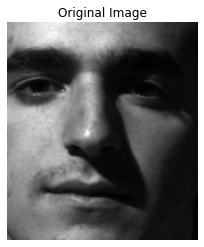

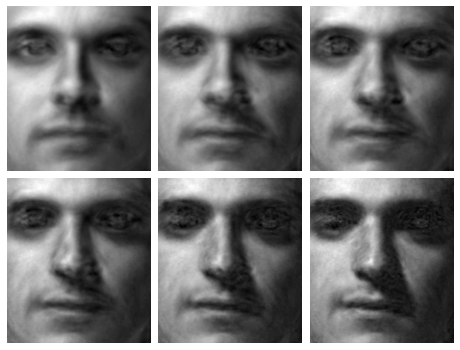

In [49]:
## Now show eigenface reconstruction of image that was omitted from test set

testFace =  img_flat =  testing_pgms_vectors[80].reshape(-1) # 2d to 1d# First face of person 37
plot_figure(np.reshape(testFace,(m,n)), label="test_img")


reconstructions = []
r_list = [50, 100, 150 , 200, 400, 800]
testFaceMS = testFace - avg_face
for r in r_list:
    alpha = left_vecs_800[:,:r].T @ testFaceMS
    reconFace = avg_face + left_vecs_800[:,:r]  @ alpha
    reconstructions.append(np.reshape(reconFace,(m,n)))



fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, reconstructions):
    # Iterating over the grid returns the Axes.
    ax.axis('off')    
    ax.imshow(im, cmap="gray")

plt.show()



## X_test Matrix Reconstruction

Matrix Shape:  (32256, 128)


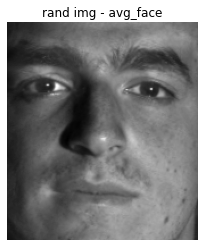

In [11]:
X_test = X_matrix(base_pth, s_strat=36, s_end=38)

# X = training_pgms_vectors >> reshape and vector to (192,168)
rand_int = np.random.randint(0,X_test.shape[1])
img_reshaped = X_test.T[rand_int].reshape(m,n)
plot_figure(img_reshaped, label="rand img - avg_face")



### Projecting all 128 test imgs `64 each person` on only 4 components of eigenfaces matrix results in only 4 values for each img and by plotting clusters of projections of combinations of two components we can see that:

**principal components (5 , 6) and (6 , 7)  can be used to recognize the two persons from each other with great accuracy using `linear regression` or `svm` or `k-means clustering` or any ML algorithm and no need to cover 90% of eigenfaces**

> project new image on PC 5, 6 will result in only 2x1 array a very simple ML algorithm can classify the persons from each other without fancy matching CV algorithms.    

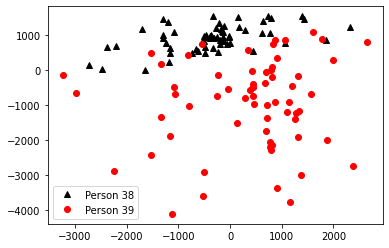

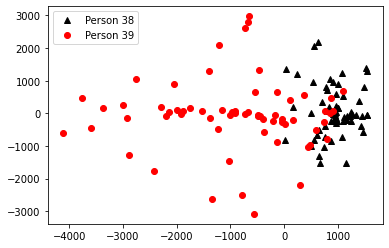

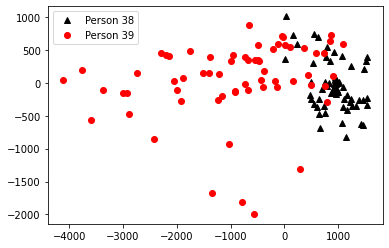

In [12]:
def PCA_projection(U_matrix, X_matrix, PCA_idx=[5,6,7]):
    PCA_P = U_matrix[ : , PCA_idx-np.ones_like(PCA_idx)].T @ X_matrix
    return PCA_P


def plot_cluster(PCA_P1, PCA_P2, pc1, pc2):
    '''
    pc1: idx of principal component from PCAmodes
    '''    
    plt.plot(PCA_P1[ pc1, : ], PCA_P1[ pc2, : ],'^',color='k',label='Person 38')
    plt.plot(PCA_P2[ pc1, : ], PCA_P2[ pc2, : ],'o',color='r',label='Person 39')
    plt.legend()
    plt.show()


PCAmodes = [5,6,7,8]
PCA_P1 = PCA_projection(U, X_test[ : ,    : 64], PCA_idx= PCAmodes)
PCA_P2 = PCA_projection(U, X_test[ : , 64 :   ], PCA_idx= PCAmodes)


plot_cluster(PCA_P1,PCA_P2, pc1=0 , pc2=1)
plot_cluster(PCA_P1,PCA_P2, pc1=1 , pc2=2)
plot_cluster(PCA_P1,PCA_P2, pc1=1 , pc2=3)


In [13]:
df_38 = pd.DataFrame(PCA_P1.T, columns = ['PC5','PC6','PC7','PC8'])
df_38['Person'] = 0

df_39 = pd.DataFrame(PCA_P2.T, columns = ['PC5','PC6','PC7','PC8'])
df_39['Person'] = 1

df = pd.concat([df_38,df_39], axis=0)


In [14]:
df

,PC5,PC6,PC7,PC8,Person
0,-308.117910,915.118454,-35.370694,-68.053428,0
1,-245.162662,939.293206,-58.598719,62.055362,0
2,-334.025043,1544.788015,-42.846505,-232.408095,0
3,-475.495976,501.031016,4.561834,5.084979,0
4,-348.259416,941.116854,-148.096245,44.078498,0
...,...,...,...,...,...
59,1108.557417,-1209.387889,2082.467530,136.992127,1
60,769.361378,-2057.041818,901.597311,34.249722,1
61,-3234.508704,-124.908472,642.803018,587.065213,1
62,-2987.437325,-661.520561,2974.284540,882.421875,1


In [15]:
from sklearn.model_selection import train_test_split

df_y = df.pop('Person')
df_x = df
df_5_6 = df_x[['PC5', 'PC6']]

x_train,x_test,y_train,y_test_5_6 = train_test_split(df_5_6, df_y, test_size=0.3, random_state=40)

In [16]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(svc)

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(x_train, y_train)
print(grid.best_params_)

model = grid.best_estimator_
yfit_5_6 = model.predict(x_test)


model = grid.best_estimator_
yfit_5_6 = model.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test_5_6, yfit_5_6,))

Wall time: 404 ms
{'svc__C': 5, 'svc__gamma': 0.0001}
              precision    recall  f1-score   support

           0       0.92      0.60      0.73        20
           1       0.69      0.95      0.80        19

    accuracy                           0.77        39
   macro avg       0.81      0.77      0.76        39
weighted avg       0.81      0.77      0.76        39



Text(91.68, 0.5, 'predicted label')

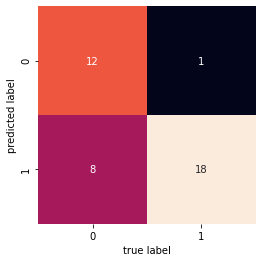

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test_5_6, yfit_5_6)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= [0,1],
            yticklabels= [0,1])
plt.xlabel('true label')
plt.ylabel('predicted label')

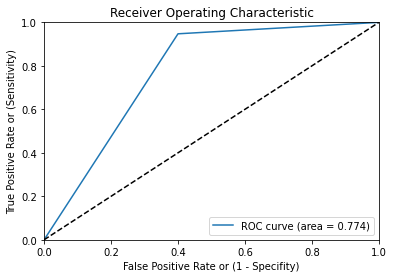

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test_5_6, yfit_5_6)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


In [22]:
from test_utils import get_roc_data

In [23]:
y_test1, yfit1 = get_roc_data(U, X_test, 5, 6)
y_test2, yfit2 = get_roc_data(U, X_test, 5, 8)
y_test3, yfit3 = get_roc_data(U, X_test, 5, 15)
y_test4, yfit4 = get_roc_data(U, X_test, 5, 20)

{'svc__C': 1, 'svc__gamma': 0.0005}
{'svc__C': 5, 'svc__gamma': 0.0001}
{'svc__C': 1, 'svc__gamma': 0.005}
{'svc__C': 1, 'svc__gamma': 0.005}


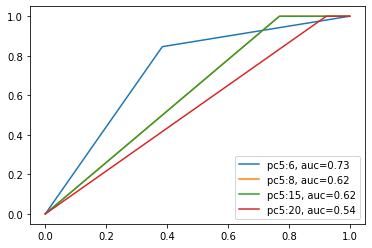

In [24]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(y_test1, yfit1)
auc = metrics.roc_auc_score(y_test1, yfit1)
plt.plot(fpr,tpr,label="pc5:6, auc="+str(np.round(auc,2)))

fpr, tpr, thresh = metrics.roc_curve(y_test2, yfit2)
auc = metrics.roc_auc_score(y_test2, yfit2)
plt.plot(fpr,tpr,label="pc5:8, auc="+str(np.round(auc,2)))

fpr, tpr, thresh = metrics.roc_curve(y_test3, yfit3)
auc = metrics.roc_auc_score(y_test3, yfit3)
plt.plot(fpr,tpr,label="pc5:15, auc="+str(np.round(auc,2)))

fpr, tpr, thresh = metrics.roc_curve(y_test4, yfit4)
auc = metrics.roc_auc_score(y_test4, yfit4)
plt.plot(fpr,tpr,label="pc5:20, auc="+str(np.round(auc,2)))

plt.legend(loc=0)